<a href="https://colab.research.google.com/github/lala991204/AI-based-financial-data-analysis/blob/master/user_data/fee_RFM_kmeans_user_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
user_df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/user_data/data/MLRD_UserData_20220120.csv", encoding='cp949')
user_df1

In [ ]:
user_df1.info()

In [ ]:
user_df11 = user_df1[['user_id', 'no_of_days_since_last_trade', 'total_no_of_trade_times', 'fee_total_usdt_since_signup']]
user_df11

In [ ]:
user_df12 = user_df1[['user_id', 'no_of_days_since_last_trade', 'total_no_of_trade_times', 'accumulative_trading_amount_in_usdt']]
user_df12

In [ ]:
# user_df = user_df1.dropna(axis=0)        
# user_df.info()

# 세 개의 컬럼에 대해 결측치 행 모두 제거
user_df = user_df11.dropna(axis=0)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85859 entries, 1 to 371191
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      85859 non-null  int64  
 1   no_of_days_since_last_trade  85859 non-null  float64
 2   total_no_of_trade_times      85859 non-null  float64
 3   fee_total_usdt_since_signup  85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [ ]:
user_df_old = user_df12.dropna(axis=0)
user_df_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85859 entries, 1 to 371191
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              85859 non-null  int64  
 1   no_of_days_since_last_trade          85859 non-null  float64
 2   total_no_of_trade_times              85859 non-null  float64
 3   accumulative_trading_amount_in_usdt  85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [ ]:
rfm_df1 = pd.DataFrame()
rfm_df1['CustomerID'] = user_df['user_id']
rfm_df1['Recency'] = user_df['no_of_days_since_last_trade']            # 최근 거래 후 몇일 지났는지
rfm_df1['Frequency'] = user_df['total_no_of_trade_times']              # 거래 총 수
rfm_df1['Monetary'] = user_df['fee_total_usdt_since_signup']           # 가입 후 수수료 총 액
rfm_df1

In [ ]:
rfm_df22 = pd.DataFrame()
rfm_df22['CustomerID'] = user_df_old['user_id']
rfm_df22['Recency'] = user_df_old['no_of_days_since_last_trade']            # 최근 거래 후 몇일 지났는지
rfm_df22['Frequency'] = user_df_old['total_no_of_trade_times']              # 거래 총 수
rfm_df22['Monetary'] = user_df_old['accumulative_trading_amount_in_usdt']           # 가입 후 수수료 총 액
rfm_df22

In [ ]:
rfm_df2 = rfm_df1.reset_index()
rfm_df = rfm_df2.drop('index', axis=1)
rfm_df

In [ ]:
rfm_df222 = rfm_df22.reset_index()
rfm_df_old = rfm_df222.drop('index', axis=1)
rfm_df_old

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85859 entries, 0 to 85858
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  85859 non-null  int64  
 1   Recency     85859 non-null  float64
 2   Frequency   85859 non-null  float64
 3   Monetary    85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.6 MB


In [ ]:
rfm_df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85859 entries, 0 to 85858
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  85859 non-null  int64  
 1   Recency     85859 non-null  float64
 2   Frequency   85859 non-null  float64
 3   Monetary    85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.6 MB


In [ ]:
rfm_df_new = rfm_df[rfm_df['Monetary']>0]
rfm_df_new

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(rfm_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(rfm_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(rfm_df['Monetary'])

In [ ]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
rfm_df_old[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
rfm_df_new[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = rfm_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)     # 값 간에 차이가 크기 때문에 scaling함.

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))    # cluster=3일 때의 실루엣 스코어임

실루엣 스코어는 : 0.622


In [ ]:
silhouette_samples(X_features_scaled, labels)

array([0.76687012, 0.5399328 , 0.54257861, ..., 0.74873046, 0.7487474 ,
       0.74877004])

In [ ]:
### 여러 개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n'
                           'Silhouette Score :' + str(round(sil_avg, 3))  )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수 별 fill_betweenx() 형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]       # 각 군집의 샘플의 갯수
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)

            # fill_betweenx(): 두 수직 방향의 곡선 사이를 채움, fill_between(): 두 수평 방향의 곡선 사이를 채움.
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,        # 앞의 array가 y역할, 뒤에 두 개가 각각 x1,x2로 봄.
                                   facecolor = color, edgecolor = color, alpha=0.7)        # 범위에 해당하는 부분 색 채움
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))     # 색 왼쪽부분 숫자 기입
            y_lower = y_upper + 10

        axs[ind].axvline(x = sil_avg, color = "red", linestyle = "--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

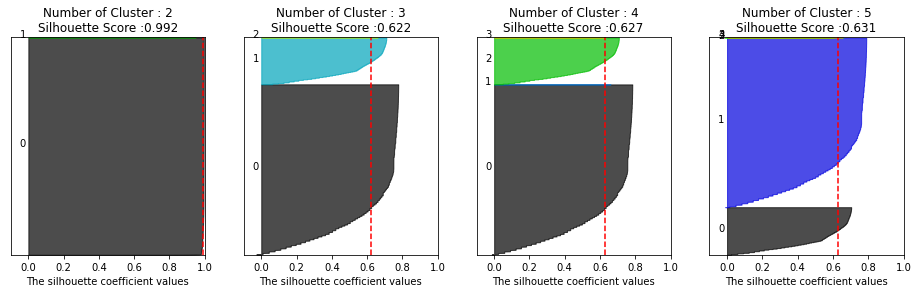

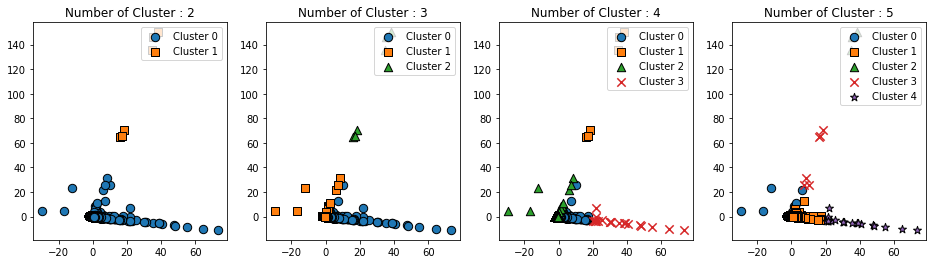

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과 도출

따라서 왜곡 정도 낮추기 위해 데이터 값에 로그 적용

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_new['Recency_log'] = np.log1p(rfm_df_new['Recency'])
rfm_df_new['Frequency_log'] = np.log1p(rfm_df_new['Frequency'])
rfm_df_new['Monetary_log'] = np.log1p(rfm_df_new['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_new[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_new['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

실루엣 스코어는 : 0.411


In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_old['Recency_log'] = np.log1p(rfm_df_old['Recency'])
rfm_df_old['Frequency_log'] = np.log1p(rfm_df_old['Frequency'])
rfm_df_old['Monetary_log'] = np.log1p(rfm_df_old['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_old[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_old['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

실루엣 스코어는 : 0.367


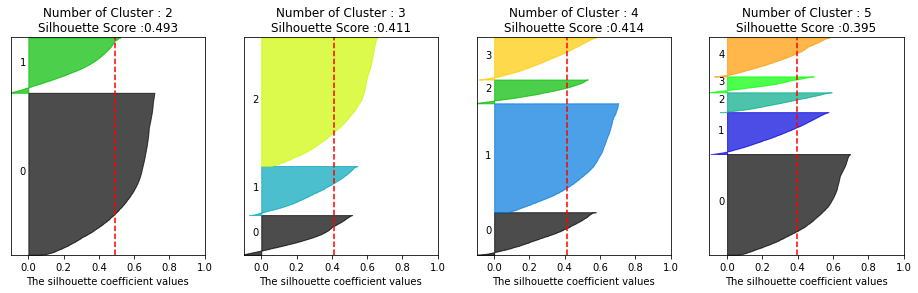

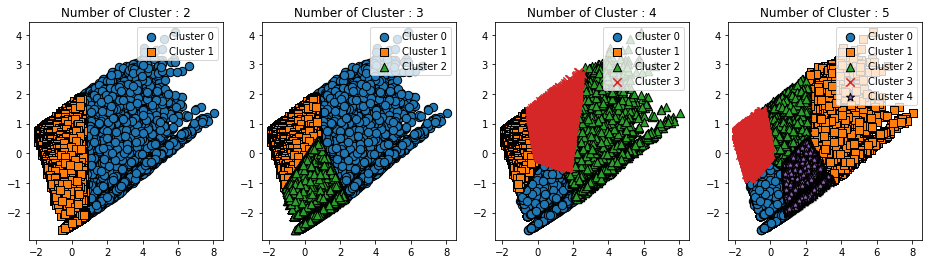

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)        # 아래를 보고 3개로 cluster하는 방법이 최적이라 판단하였음.

In [ ]:
rfm_df_new        # 고객 세그멘테이션(RFM방법) 결과 ['cluster_label']

@@결측치 수정후

In [ ]:
rfm_df_new.groupby(['cluster_label']).count()['CustomerID']    

cluster_label
0    15666
1    19358
2    50787
Name: CustomerID, dtype: int64

In [ ]:
rfm_df_old.groupby(['cluster_label']).count()['CustomerID']    

cluster_label
0    48069
1    17551
2    20239
Name: CustomerID, dtype: int64

# RFM기법으로 다음과 같이 고객 분류됨

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['CustomerID']

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['CustomerID']

32       602468859
57       602468954
61       602468966
76       602469042
84       602469074
           ...    
85854    602839890
85855    602839893
85856    602839899
85857    602839900
85858    602839909
Name: CustomerID, Length: 19358, dtype: int64

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['CustomerID']

0        602468719
1        602468721
2        602468732
3        602468733
5        602468737
           ...    
85794    602839443
85805    602839514
85808    602839526
85811    602839553
85819    602839635
Name: CustomerID, Length: 50787, dtype: int64

# 결과 분포로 확인

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Monetary'].describe()

# monetary = 총 거래량 vs 총 수수료 고객 비교

old 0    :48069
1    :17551
2    :20239
(2,1,0 순으로 거래소에 영향 주는 고객 집단)

new
0    :15666
1    :19358
2    :50787
(0,1,2 순으로 거래소에 영향 주는 고객 집단)

In [ ]:
lable0_new = list(rfm_df_new[rfm_df_new['cluster_label']==0]['CustomerID'].values)
lable1_new = list(rfm_df_new[rfm_df_new['cluster_label']==1]['CustomerID'].values)
lable2_new = list(rfm_df_new[rfm_df_new['cluster_label']==2]['CustomerID'].values)

lable0_old = list(rfm_df_old[rfm_df_old['cluster_label']==0]['CustomerID'].values)
lable1_old = list(rfm_df_old[rfm_df_old['cluster_label']==1]['CustomerID'].values)
lable2_old = list(rfm_df_old[rfm_df_old['cluster_label']==2]['CustomerID'].values)

교집합

In [ ]:
first_interaction = list(set(lable2_old) & set(lable0_new))
print( first_interaction )
print(len(first_interaction))

In [ ]:
second_interaction = list(set(lable1_old) & set(lable1_new))
print( second_interaction )
print(len(second_interaction))

In [ ]:
third_interaction = list(set(lable0_old) & set(lable2_new))
print( third_interaction )
print(len(third_interaction))

차집합

In [ ]:
first_complement = list(set(lable0_new) - set(lable2_old))
print( first_complement )
print( len(first_complement) )

In [ ]:
second_complement = list(set(lable1_new) - set(lable1_old))
print( second_complement )
print( len(second_complement) )

In [ ]:
third_complement = list(set(lable2_new) - set(lable0_old))
print( third_complement )
print( len(third_complement) )

In [ ]:
first_complement_1 = list(set(lable2_old) - set(lable0_new))
print( first_complement_1 )
print( len(first_complement_1) )

In [ ]:
second_complement_1 = list(set(lable1_old) - set(lable1_new))
print( second_complement_1 )
print( len(second_complement_1) )

In [ ]:
third_complement_1 = list(set(lable0_old)-set(lable2_new))
print( third_complement_1 )
print( len(third_complement_1) )

# cluster=5

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_new['Recency_log'] = np.log1p(rfm_df_new['Recency'])
rfm_df_new['Frequency_log'] = np.log1p(rfm_df_new['Frequency'])
rfm_df_new['Monetary_log'] = np.log1p(rfm_df_new['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_new[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_new['cluster_label_5'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

실루엣 스코어는 : 0.395


In [ ]:
cluster_labels = kmeans.fit_predict(X_features)

sil_avg = silhouette_score(X_features, cluster_labels)
sil_values = silhouette_samples(X_features, cluster_labels)

In [ ]:
ith_cluster_sil_values = sil_values[cluster_labels == 0]
ith_cluster_sil_values.sort()
ith_cluster_sil_values[ith_cluster_sil_values<0]

In [ ]:
i2th_cluster_sil_values = sil_values[cluster_labels == 1]
i2th_cluster_sil_values.sort()
# i2th_cluster_sil_values
i2th_cluster_sil_values[i2th_cluster_sil_values<0]

In [ ]:
i3th_cluster_sil_values = sil_values[cluster_labels == 2]
i3th_cluster_sil_values.sort()
i3th_cluster_sil_values.shape

(38223,)

In [ ]:
i4th_cluster_sil_values = sil_values[cluster_labels == 3]
i4th_cluster_sil_values.sort()
i4th_cluster_sil_values

array([-0.15820736, -0.15652841, -0.15256203, ...,  0.49028741,
        0.49058815,  0.4906325 ])

In [ ]:
i5th_cluster_sil_values = sil_values[cluster_labels == 4]
i5th_cluster_sil_values.sort()
i5th_cluster_sil_values

array([-0.04789611, -0.04744761, -0.04725345, ...,  0.57746676,
        0.57754643,  0.578231  ])

In [ ]:
rfm_df_new

In [ ]:
rfm_df_new.groupby(['cluster_label_5']).count()['CustomerID']    

cluster_label_5
0    39781
1    16538
2     7810
3     6277
4    15405
Name: CustomerID, dtype: int64

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Monetary'].describe()